# **Assignment Python 3 - Bank Marketing Data Set**

Name: Sarah Aristawidya

Class: PYTN-KS19

# **Project Overview**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

This dataset contains:

Input variables:

**Bank client data:**

1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6. housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
7. loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

**Related with the last contact of the current campaign:**

8. contact: contact communication type (categorical: 'cellular', 'telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

**Social and economic context attributes**

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21. y - has the client subscribed a term deposit? (binary: 'yes', 'no')

**Link Dataset:** https://archive.ics.uci.edu/dataset/222/bank+marketing

# Import the Library Required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary libraries from scikit-learn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Import necessary libraries for preprocessing
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, StandardScaler, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer

# Import necessary libraries for machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report

In [2]:
colors = sns.color_palette("Set2")
colors

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

# **Data**
Load Data: Reading a CSV file containing Bank Additional full into a DataFrame using the pandas library.
<hr>

In [3]:
df = pd.read_csv("bank-additional-full.csv", sep=';') 
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Show how many rows and columns in dataset
df.shape

(41188, 21)

# Data Cleaning
Data cleaning is the process of identifying and correcting errors, inconsistencies, and inaccuracies in a dataset, ensuring that the data is accurate, complete, and ready for analysis.
<hr>

In [5]:
# Drop duration features
df = df.drop(['duration'], axis=1)

In [6]:
# View data type information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [7]:
# Divide based on numerical and cateogrical features
numerical_feat = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
categorical_feat = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

In [8]:
# Check the number of missing values in the dataset
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
# View data type information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

## **Data Distribution**
Data distribution describes how data is spread or distributed across different values, revealing insights into its central tendency, variability, and shape.
<hr>

In [10]:
# Plot Histogram, KDE, Boxplot for numerical exploratory data analysis (EDA) in a classification task

def num_eda(data, feature, target, bins):
    # Separate the dataset into positive and negative classes based on the target variable
    df_set_pos = data[data[target] == "yes"].drop(target, axis=1)
    df_set_neg = data[data[target] == "no"].drop(target, axis=1)

    # Create a subplot for visualizations
    fig, axes = plt.subplots(2, 2, figsize=(18, 6))

    # Plot a histogram with kernel density estimate (KDE) for the specified numerical feature
    ax1 = sns.histplot(x=feature, data=data, ax=axes[0, 0], bins=bins, kde=True, edgecolor="k", color=colors[4])
    ax1.grid(linestyle='--', linewidth=0.1, color=colors[7])
    ax1.set_title(f"{feature} Distribution")

    # Plot KDEs for the positive and negative target classes on the same axis
    ax2 = sns.kdeplot(x=feature, data=df_set_pos, ax=axes[0, 1], label="yes", color=colors[2])
    ax2_1 = sns.kdeplot(x=feature, data=df_set_neg, ax=axes[0, 1], label="no", color=colors[1])
    ax2.grid(linestyle='--', linewidth=0.1, color=colors[7])
    ax2.set_title(f"{feature} Distribution by Target Class")
    ax2.legend()

    # Plot a boxplot for the numerical feature
    ax3 = sns.boxplot(x=feature, data=data, ax=axes[1, 0], color=colors[4])
    ax3.grid(linestyle='--', linewidth=0.5, color=colors[7])

    # Plot a horizontal boxplot for the numerical feature with respect to the target variable
    ax4 = sns.boxplot(x=feature, y=target, data=data, ax=axes[1, 1], orient="h", hue=target,
                      palette=[colors[1], colors[2]], legend=False)
    ax4.grid(linestyle='--', linewidth=0.1, color=colors[7])

## Age

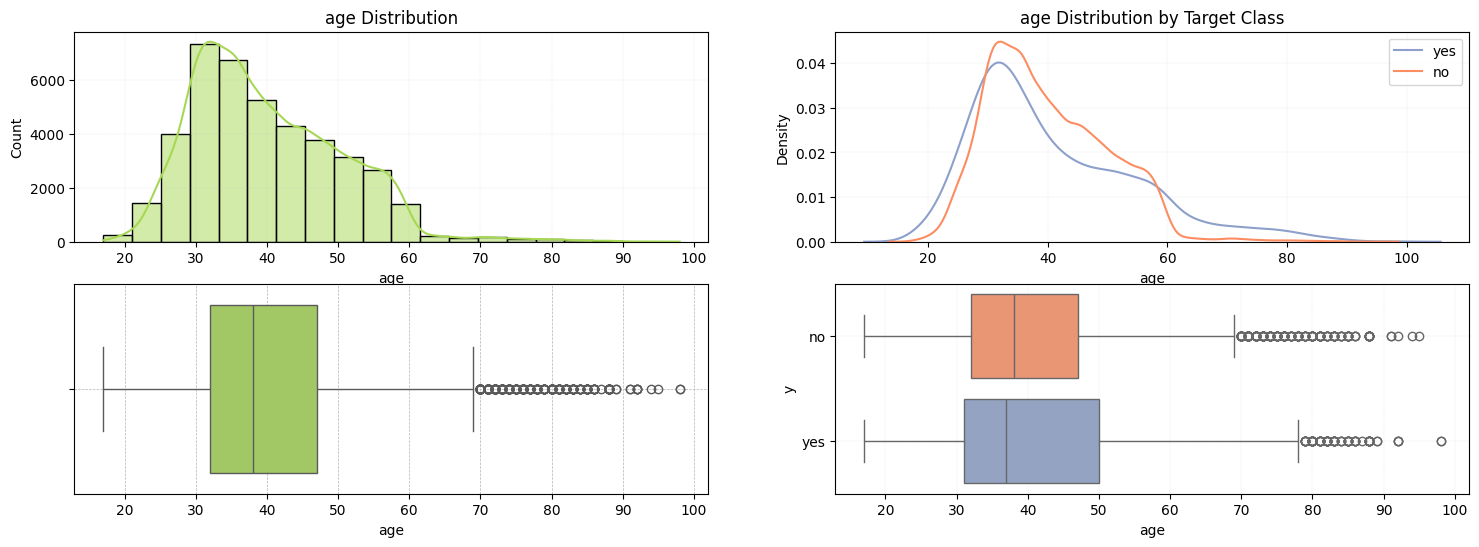

In [11]:
num_eda(df,"age","y",bins = 20)

**Conclusion:**

The customer base `ranges from 20 to 90 years old`, but the majority of customers fall between the ages of 20 and 60. For customers aged 70 and above, there tends to be a slightly higher success rate in campaigns.

## Campaign

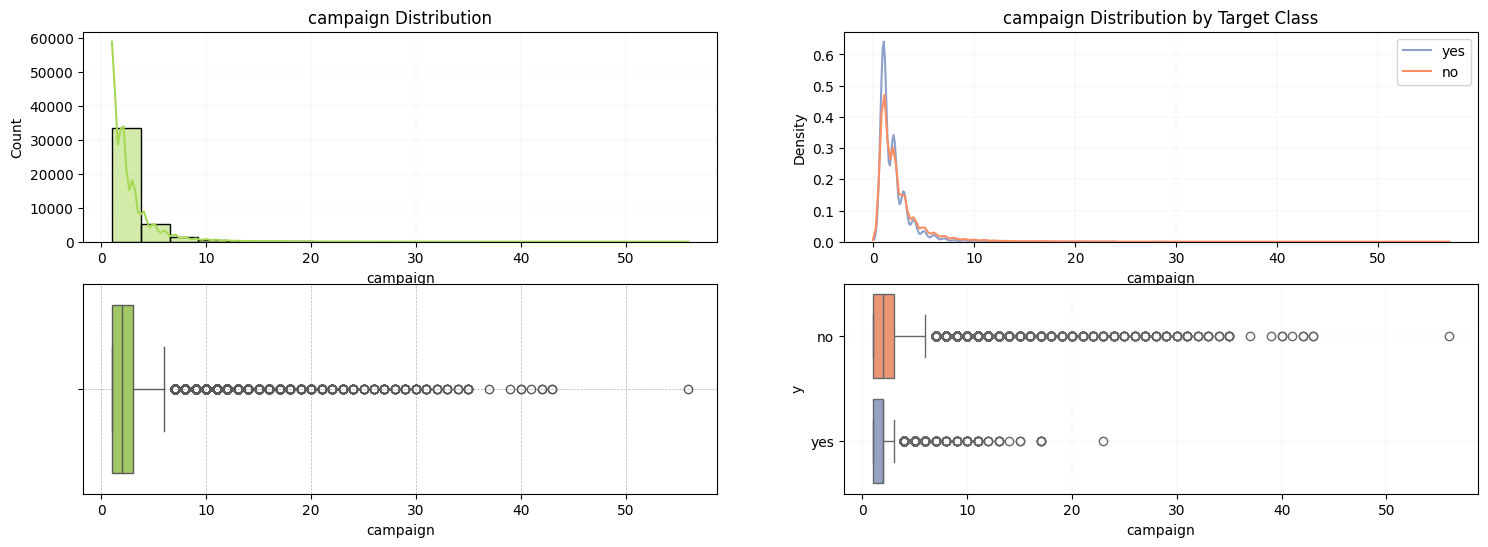

In [12]:
num_eda(df,"campaign","y",bins = 20)

**Conclusion:**

A campaign count `exceeding 20 tends to yield more "no" results` than "yes" results.

## Pdays

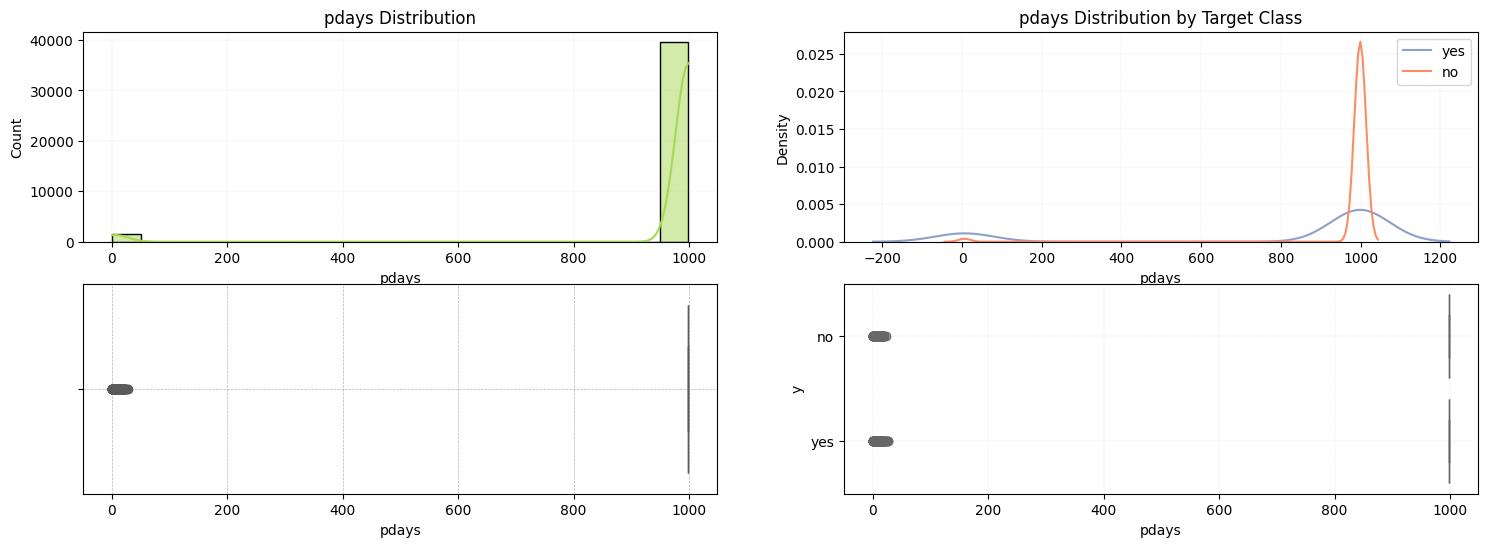

In [13]:
num_eda(df,"pdays","y",bins = 20)

**Conclusion:**

The "pdays" column has a value of 999, indicating that the customer has not been contacted before. This value can serve as a good indicator to predict whether the customer will subscribe to a deposit. Therefore, it will be left as is. We can create new features from this column, such as "pyears" and "pmonth," which represent the conversion from days to years or months. Additionally, we can create a feature to determine whether the customer has been recently contacted or not based on this information.

## Previous and other numerical features

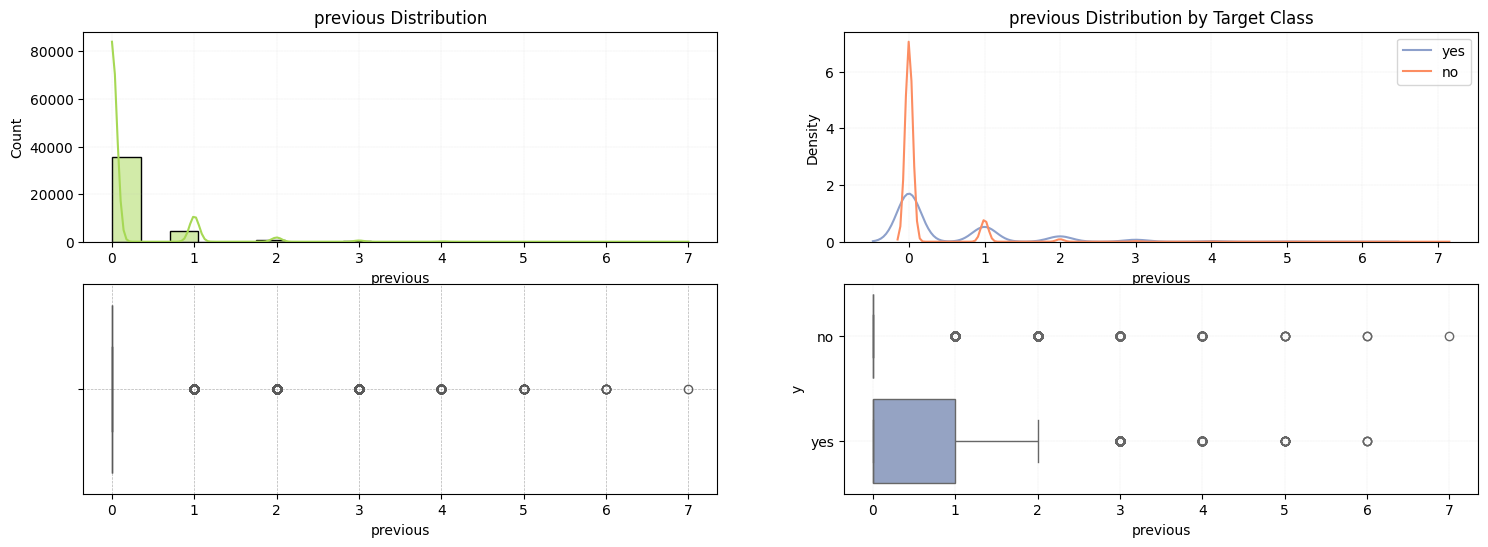

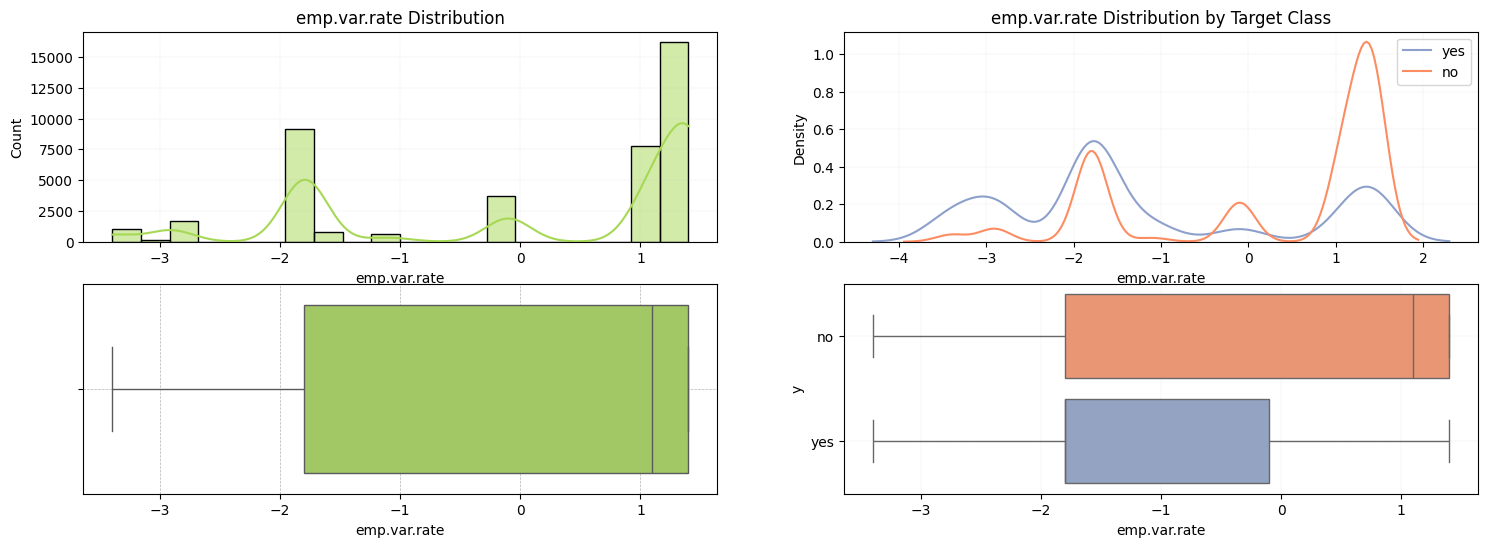

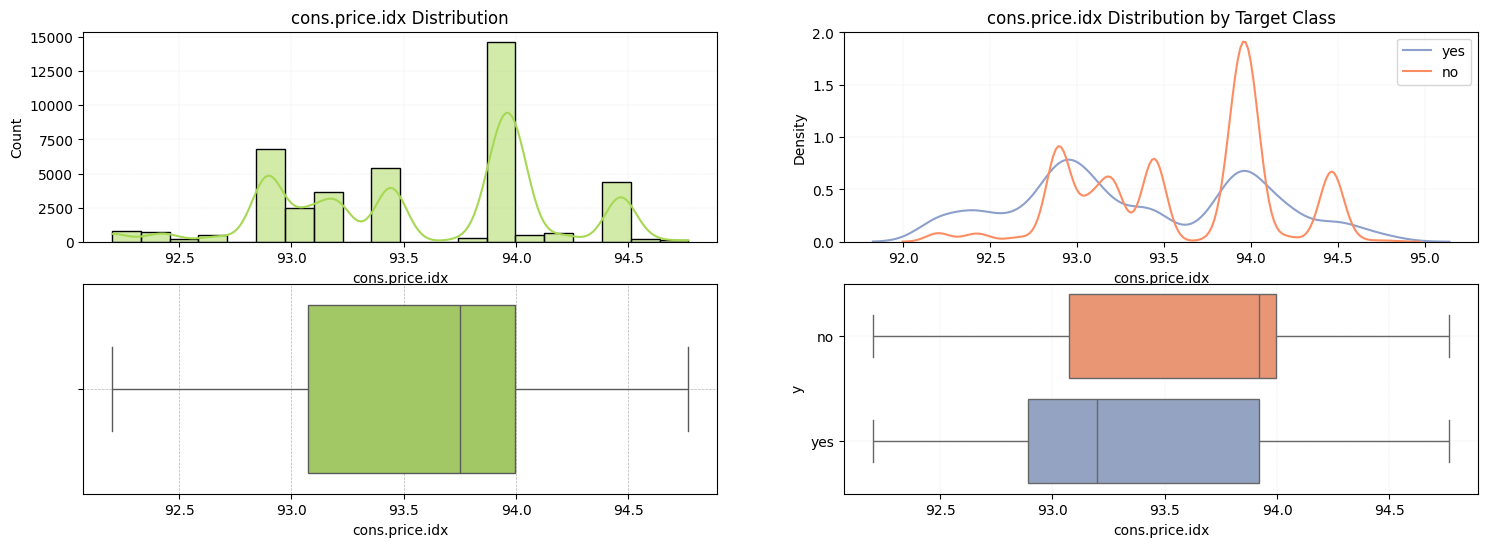

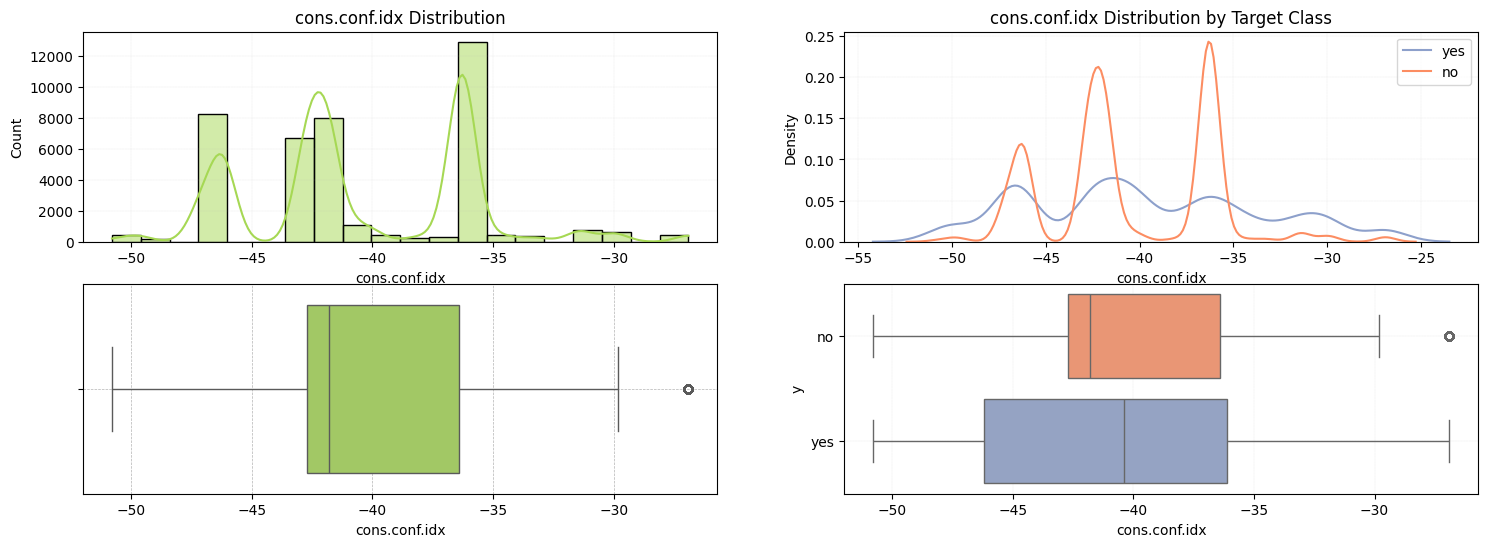

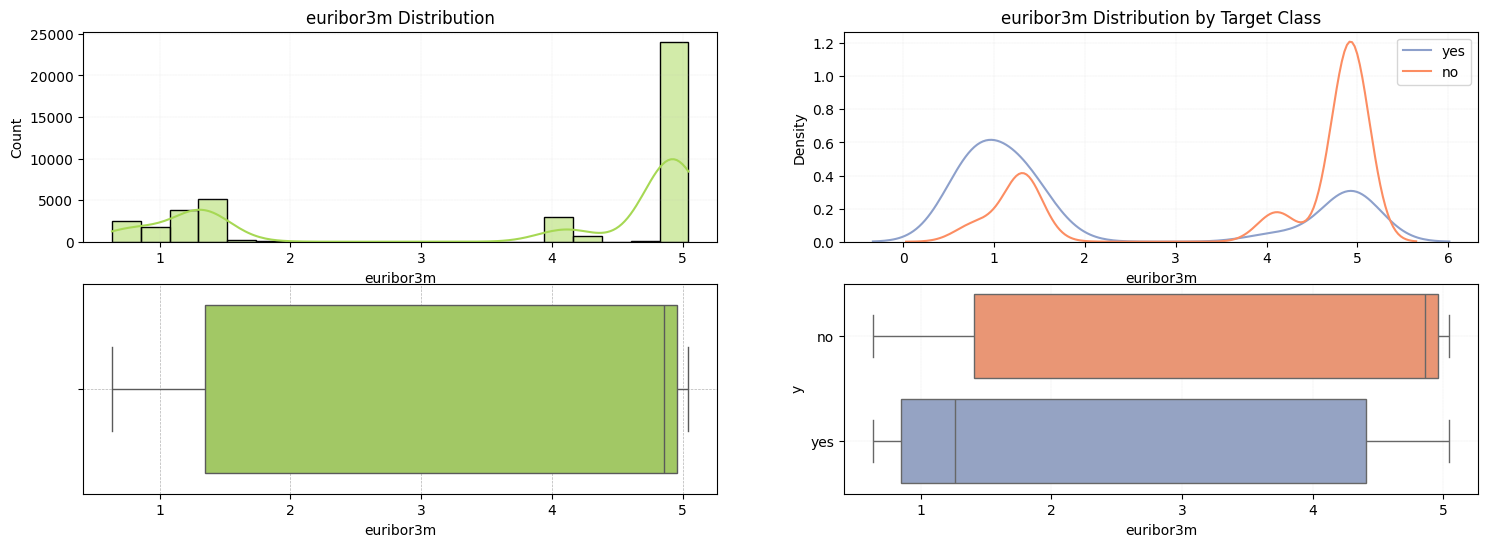

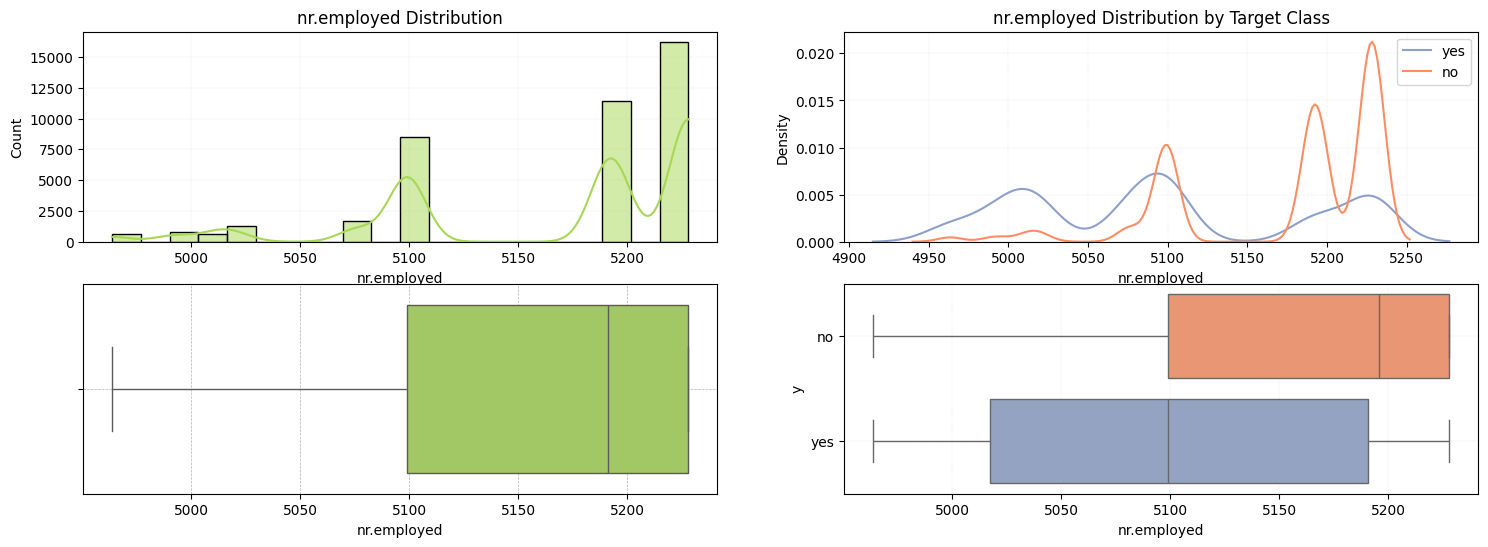

In [14]:
other_columns = ['previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
for col in other_columns:
    num_eda(df,col,"y",bins = 20)

In [15]:
df[categorical_feat].describe(include='all').T.sort_values('unique',ascending=False)

,count,unique,top,freq
job,41188,12,admin.,10422
month,41188,10,may,13769
education,41188,8,university.degree,12168
day_of_week,41188,5,thu,8623
marital,41188,4,married,24928
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
poutcome,41188,3,nonexistent,35563
contact,41188,2,cellular,26144


`Features job has the highest unique values 12`, followed by education 8, and month 10. The rest of the features have a small number of unique values. 

In [16]:
# Plot categorical Data (classification Task)
def cat_eda(data, feature, target):
    # Create a 1x2 subplot grid
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Count plot for feature distribution
    ax1 = sns.countplot(x=feature, data=data, ax=axes[0], color=colors[4], edgecolor=colors[7])
    ax1.set_title(f"{feature} Distribution")

    # Set the ticks and labels with rotation
    ax1.set_xticks(ax1.get_xticks())
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

    # Annotate bars with count values
    for p in ax1.patches:
        ax1.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Count plot for feature distribution with target
    ax2 = sns.countplot(x=feature, hue=target, data=data, ax=axes[1], palette=[colors[1], colors[2]], edgecolor=colors[7])
    ax2.set_title(f"{feature} Distribution with Target")

    # Set the ticks and labels with rotation
    ax2.set_xticks(ax2.get_xticks())
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

    # Annotate bars with count values for each hue
    for p in ax2.patches:
        ax2.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Place legend outside the plot
    ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()

## Job, Marital, Education, Poutcome, Month, Contact

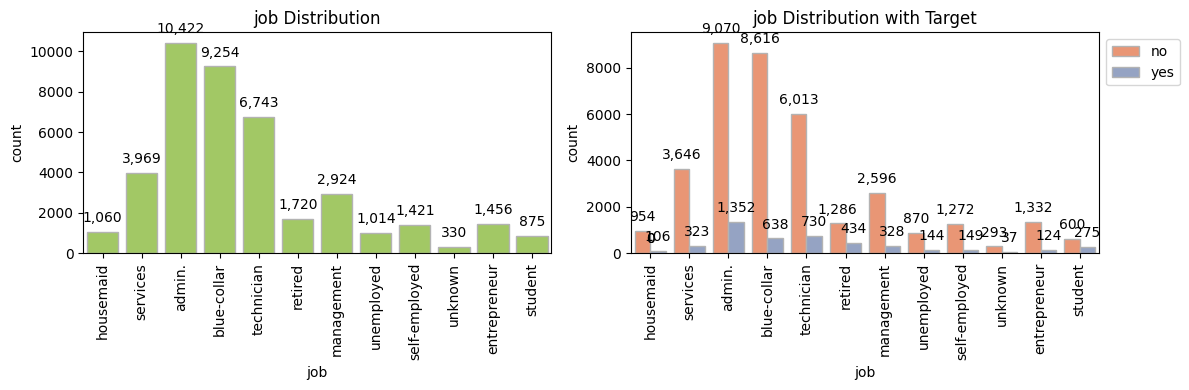

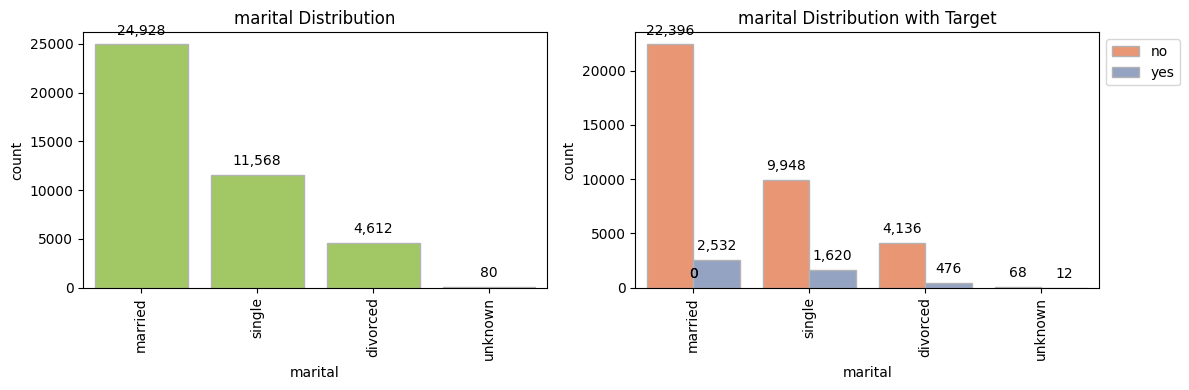

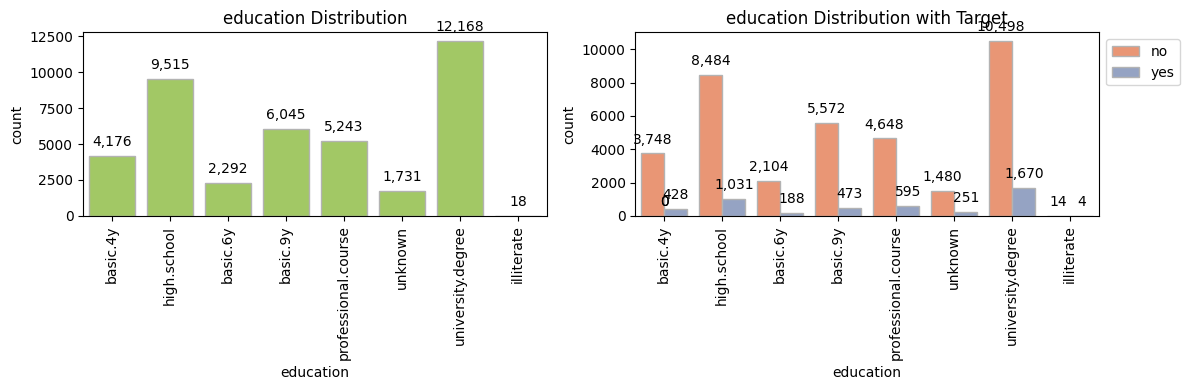

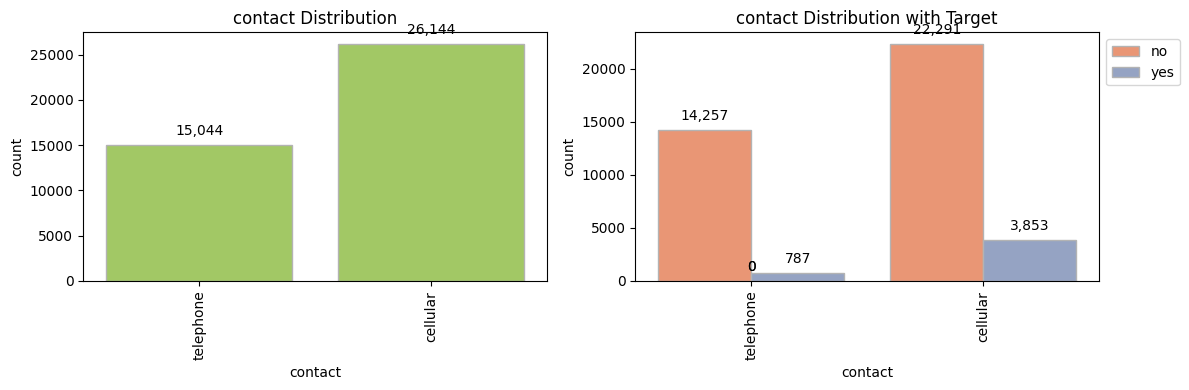

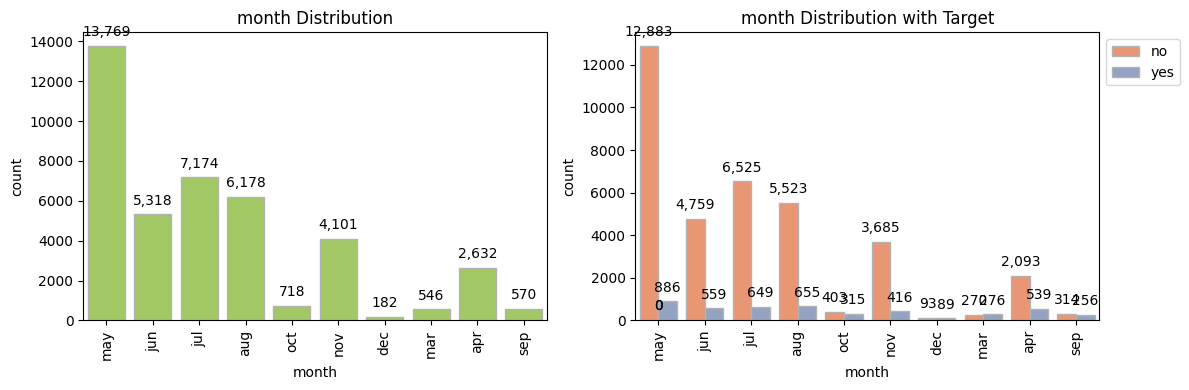

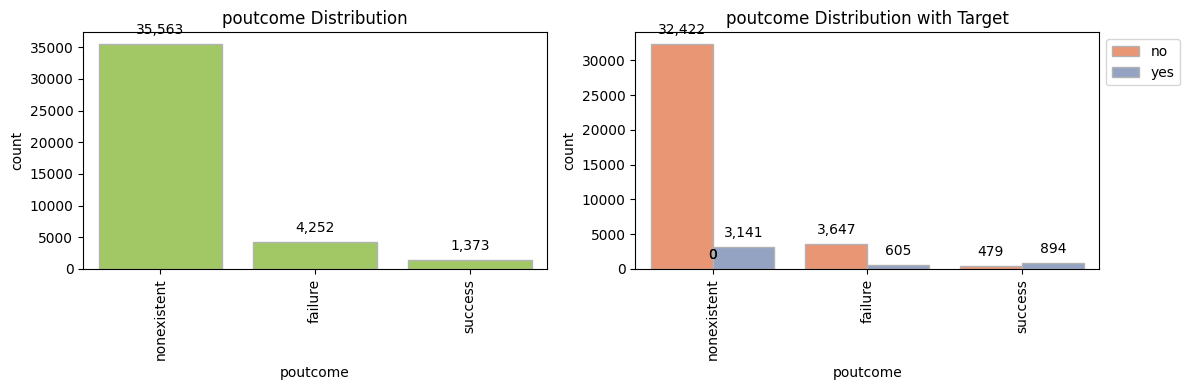

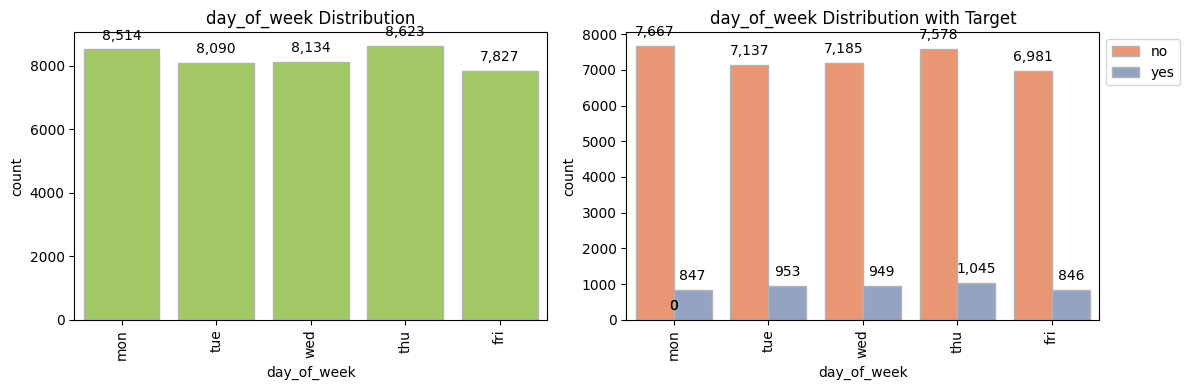

In [17]:
# Example usage
col1 = ["job", "marital", "education", "contact", "month", "poutcome", 'day_of_week']
for col in col1:
    cat_eda(df, col, "y")

## Default, Housing, Loan

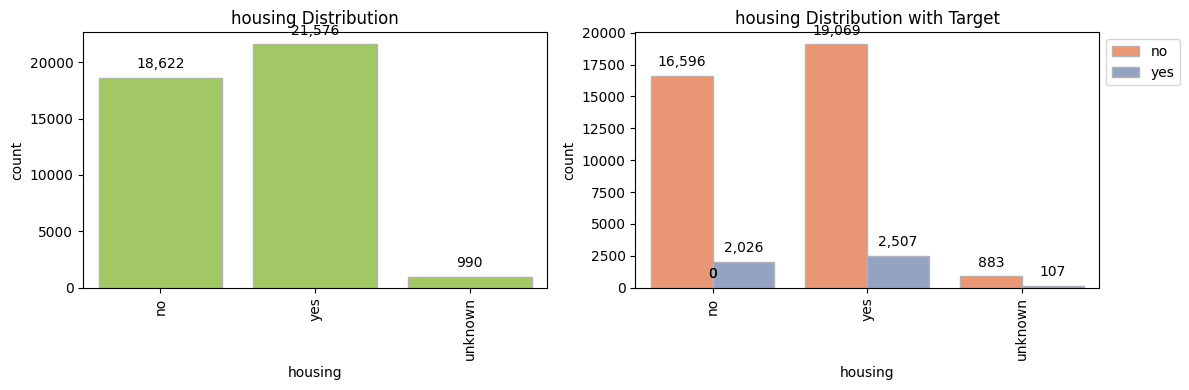

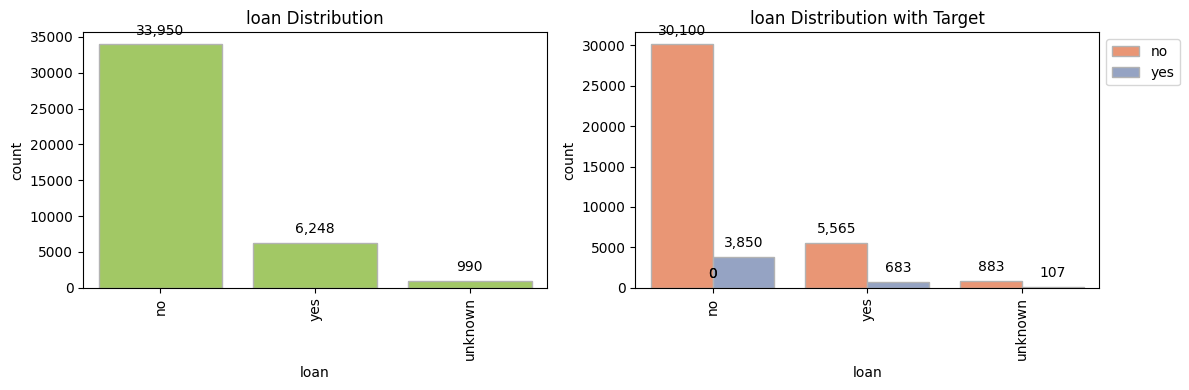

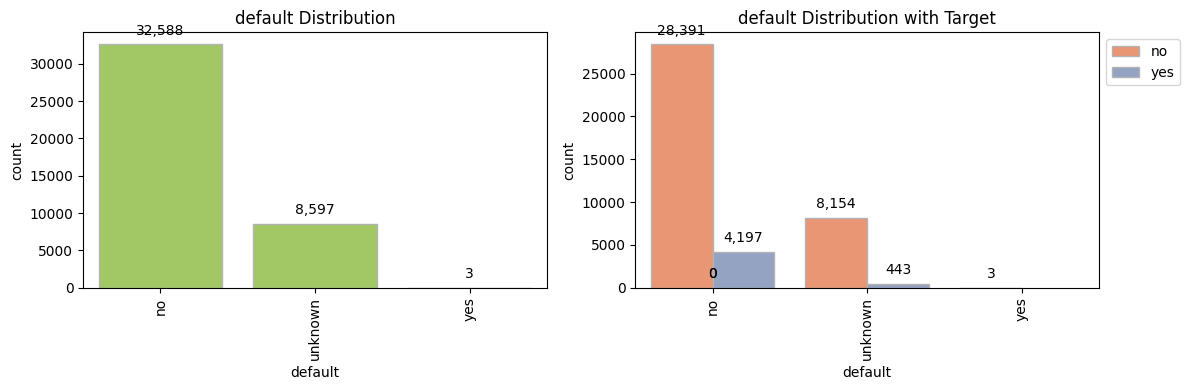

In [18]:
col2 = ["housing","loan","default"]
for col in col2:
    cat_eda(df,col,"y")

# Y Distribution

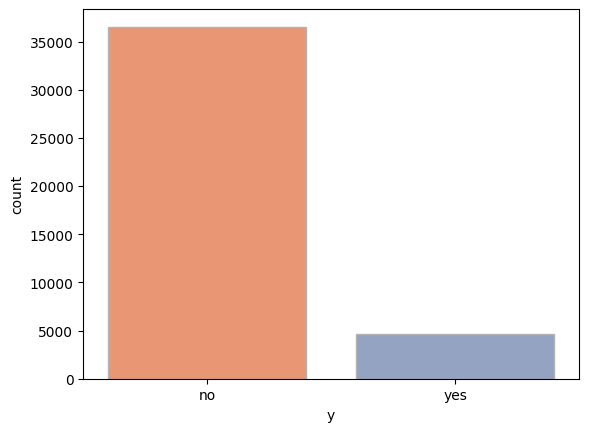

In [19]:
sns.countplot(x="y", data=df, hue="y", palette=[colors[1], colors[2]], edgecolor=colors[7], legend=False)
plt.show()

# Feature Engineering

In [20]:
# Count yes, unknown, and no for features default, housing, loan
def count_feat(data):
    data = data.copy()
    data['yes_count'] = (data[["default","loan","housing"]] == "yes").sum(axis = 1)
    data['unknown_count'] = (data[["default","loan","housing"]] == "unknown").sum(axis = 1)
    data['no_count'] = (data[["default","loan","housing"]] == "no").sum(axis = 1)
    return data

df = count_feat(df)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,yes_count,unknown_count,no_count
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,3
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,2
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,2
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,3
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,2


# Data Splitting

In [21]:
# Extract features (X) and target variable (y) from the DataFrame 'df'
X = df.drop(columns=["y"])

# Initialize a LabelEncoder to convert the categorical target variable 'y' into numerical format
le = LabelEncoder()

# Transform the categorical target variable 'y' into numerical labels
y = df.y
y = le.fit_transform(y)

# Split the dataset into training and testing sets using stratified shuffle splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# Display the shapes of the resulting training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28831, 22), (12357, 22), (28831,), (12357,))

# **Data Preprocessing**

* Numerical Features : Standarization
* Categorical Features : Target Encoding
<hr>

In [22]:
# Extend the list of numerical features with additional counts: 'yes_count', 'unknown_count', 'no_count'
numerical_feat = numerical_feat + ['yes_count', 'unknown_count', 'no_count']

# Create a StandardScaler transformer for numerical features
numerical_transformer = StandardScaler()

# Create a TargetEncoder transformer for categorical features
categorical_transformer = TargetEncoder(random_state=42)

# Create a ColumnTransformer to apply different transformers to numerical and categorical features
preprocessor = ColumnTransformer([
    ('numeric', numerical_transformer, numerical_feat),
    ('categoric', categorical_transformer, categorical_feat)
]).set_output(transform='pandas')

# Fit and transform the training data using the preprocessor
X_train_trans = preprocessor.fit_transform(X_train, y_train)

# Transform the testing data using the preprocessor
X_test_trans = preprocessor.transform(X_test)

In [23]:
X_train_trans.head()

,numeric__age,numeric__campaign,numeric__pdays,numeric__previous,numeric__emp.var.rate,numeric__cons.price.idx,numeric__cons.conf.idx,numeric__euribor3m,numeric__nr.employed,numeric__yes_count,...,categoric__job,categoric__marital,categoric__education,categoric__default,categoric__housing,categoric__loan,categoric__contact,categoric__month,categoric__day_of_week,categoric__poutcome
7309,0.961016,-0.202499,0.198881,-0.350844,0.648136,0.722717,0.887472,0.714873,0.332204,-1.071275,...,0.074562,0.138888,0.112084,0.128536,0.107550,0.112102,0.051470,0.064100,0.122392,0.086912
4169,1.057229,0.887201,0.198881,-0.350844,0.648136,0.722717,0.887472,0.713720,0.332204,-1.071275,...,0.081698,0.101004,0.111413,0.055390,0.111433,0.113057,0.051980,0.066558,0.103135,0.087726
35810,0.576165,-0.202499,0.198881,-0.350844,-1.198744,-1.181025,-1.231784,-1.368338,-0.935879,0.509619,...,0.107605,0.101877,0.107762,0.128536,0.116570,0.112102,0.148343,0.064100,0.102857,0.086912
9668,0.576165,-0.565732,0.198881,-0.350844,0.839193,1.537124,-0.280281,0.773060,0.844128,0.509619,...,0.129690,0.140784,0.138371,0.128412,0.113843,0.112892,0.053626,0.101252,0.103755,0.088634
34389,-1.444302,0.887201,0.198881,-0.350844,-1.198744,-1.181025,-1.231784,-1.355664,-0.935879,-1.071275,...,0.080539,0.143816,0.107886,0.128960,0.109438,0.111809,0.146038,0.064512,0.119806,0.088034


# **Define Evaluation Metrics and Strategy**

In this case, Cross Validation will be used to evaluate the model, and the chosen metric is the F1-Score. Repeat Stratified K-Fold cross-validation will be employed due to the imbalanced nature of the data. The model with the highest F1-Score will be selected as the best-performing model. Subsequently, the chosen model will undergo further evaluation using the test data.
<hr>

In [24]:
# 3 fold, 3 kali pengulangan
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)
# f1 score

# Spot Check Algorithms

In [25]:
# Create a dictionary of machine learning models
model_list = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(cache_size=50),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
} 

# Initialize a StandardScaler to scale the training and testing data
scaler = StandardScaler()

# Scale the training data using the StandardScaler
X_train_scaled = scaler.fit_transform(X_train_trans)

# Scale the testing data using the fitted StandardScaler from the training data
X_test_scaled = scaler.transform(X_test_trans)

# Define a function to evaluate multiple machine learning models using cross-validation
def evaluate_model(model_list, X_train, y_train, X_test, y_test, cv):
    model_name = []
    model_mean = []
    model_train_scores = []
    model_test_scores = []

    # Iterate through the models in the model list
    for name, model in model_list.items():
        # Perform cross-validation and calculate the mean F1 score
        scores = cross_val_score(model, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
        
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Calculate F1 scores for training and testing data
        train_scores = f1_score(y_train, model.predict(X_train), average='binary')
        test_scores = f1_score(y_test, model.predict(X_test), average='binary')

        # Append model information to lists
        model_name.append(name)
        model_mean.append(scores.mean())
        model_train_scores.append(train_scores)
        model_test_scores.append(test_scores)

    # Create a DataFrame summarizing model performance
    return pd.DataFrame({
        "Model": model_name,
        "Validation Score": model_mean,
        "Train Score": model_train_scores,
        "Test Score": model_test_scores
    }).sort_values("Validation Score", ascending=False)

# **Training Model**
Training a model involves teaching it to make predictions or decisions by exposing it to a labeled dataset. 
<hr>

In [26]:
evaluate_model(model_list, X_train_scaled, y_train, X_test_scaled, y_test, cv)

,Model,Validation Score,Train Score,Test Score
3,Naive Bayes,0.432557,0.433264,0.452855
1,KNN,0.364603,0.488274,0.391284
5,Random Forest,0.362921,0.995829,0.374873
0,Logistic Regression,0.332646,0.335826,0.333154
2,SVM,0.322920,0.387829,0.335878
4,Decision Tree,0.307595,0.996447,0.340497


`Naive Bayes has the highest F1-Score` when compared to other models; `however, the resulting scores are not sufficiently good`.

In [27]:
from sklearn.metrics import classification_report

nb = GaussianNB()

# Assuming nb is your Naive Bayes model
nb.fit(X_train_scaled, y_train)

# Use X_test_scaled for predictions on the test set
y_pred = nb.predict(X_test_scaled)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     10965
           1       0.41      0.50      0.45      1392

    accuracy                           0.86     12357
   macro avg       0.67      0.70      0.69     12357
weighted avg       0.88      0.86      0.87     12357



In the above classification report, it can be observed that the scores for the minority class (yes) are low. This may be due to the imbalanced nature of the data.

# Imbalanced Solution

To address imbalanced data, one of the simplest methods is to use the class_weight='balanced' parameter in the chosen model. By using this parameter, the cost function will calculate a different loss for each class, allowing the model to focus more on predicting the minority class.

In [28]:
# Create a dictionary of balanced machine learning models by setting 'class_weight' to 'balanced'
model_list_balanced = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "SVM": SVC(class_weight='balanced', cache_size=50),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced')
}

# Evaluate the performance of the balanced models using the previously defined evaluate_model function
# The function takes the balanced model dictionary, scaled training and testing data, target variables, and cross-validation as inputs
evaluate_model(model_list_balanced, X_train_scaled, y_train, X_test_scaled, y_test, cv)

,Model,Validation Score,Train Score,Test Score
1,SVM,0.463101,0.486708,0.492558
0,Logistic Regression,0.430429,0.432854,0.450758
3,Random Forest,0.322848,0.996166,0.372499
2,Decision Tree,0.297862,0.996166,0.346980


In [29]:
svc_balanced = SVC(class_weight='balanced', cache_size=50)
svc_balanced.fit(X_train_scaled,y_train)
print(classification_report(y_test,svc_balanced.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     10965
           1       0.40      0.63      0.49      1392

    accuracy                           0.85     12357
   macro avg       0.68      0.76      0.70     12357
weighted avg       0.89      0.85      0.87     12357



By using the class_weight='balanced' parameter, some models experience an increase in F1-Score, while others may see a decrease. In the case of the SVM model, the `F1-Score has increased from 0.322920 to 0.463101, surpassing the Naive Bayes model`.

The second approach to address imbalance is to use oversampling and/or undersampling methods. These methods alter the class proportions by adding or removing data. In this case, the SMOTE (Synthetic Minority Over-sampling Technique) method will be used for oversampling, and random sampling for undersampling.

# SMOTE + RandomUndersampler

In [30]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [31]:
# Define a function to evaluate machine learning models within a pipeline
def evaluate_model_pipeline(model_list, model_pipeline, X_train, y_train, X_test, y_test, cv):
    # Initialize empty lists to store model evaluation metrics
    model_name = []
    model_mean = []
    model_train_scores = []
    model_test_scores = []

    # Iterate through the models in the provided model_list
    for name, model in model_list.items():
        # Set the model within the pipeline
        model_pipeline.set_params(model=model)
        
        # Perform cross-validation and calculate the mean F1 score
        scores = cross_val_score(model_pipeline, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
        
        # Fit the pipeline to the training data
        model_pipeline.fit(X_train, y_train)
        
        # Calculate F1 scores for training and testing data
        train_scores = f1_score(y_train, model_pipeline.predict(X_train), average='binary')
        test_scores = f1_score(y_test, model_pipeline.predict(X_test), average='binary')

        # Append model information to lists
        model_name.append(name)
        model_mean.append(scores.mean())
        model_train_scores.append(train_scores)
        model_test_scores.append(test_scores)

    # Create a DataFrame summarizing model performance
    return pd.DataFrame({
        "Model": model_name,
        "Validation Score": model_mean,
        "Train Score": model_train_scores,
        "Test Score": model_test_scores
    }).sort_values("Validation Score", ascending=False)

In [32]:
# Create an instance of SMOTE with a specified sampling strategy and random state
smote = SMOTE(sampling_strategy=0.8, random_state=42)

# Create an instance of RandomUnderSampler with a specified sampling strategy
under = RandomUnderSampler(sampling_strategy=0.6)

# Create a machine learning model pipeline with resampling steps and a placeholder for the model
model_pipeline = Pipeline([
    ('under', under),        # Apply RandomUnderSampler
    ('imbalanced', smote),   # Apply SMOTE
    ('model', None)          # Placeholder for the model
])

# Define a dictionary of imbalanced machine learning models with specified class weights
model_list_imbalanced = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(class_weight='balanced', cache_size=50),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced')
}

# Evaluate the performance of imbalanced models within the specified pipeline using cross-validation
# The function takes the imbalanced model dictionary, the pipeline, scaled training and testing data, target variables, and cross-validation as inputs
evaluate_model_pipeline(model_list_imbalanced, model_pipeline, X_train_scaled, y_train, X_test_scaled, y_test, cv)

,Model,Validation Score,Train Score,Test Score
2,SVM,0.455955,0.468896,0.481391
5,Random Forest,0.444577,0.721297,0.293985
3,Naive Bayes,0.431211,0.432104,0.463594
0,Logistic Regression,0.429542,0.432126,0.449487
1,KNN,0.349810,0.427963,0.363892
4,Decision Tree,0.288059,0.542056,0.251131


Based on the modeling results using various models and methods, it can be concluded that `the best-selected model is SVM with class weighting`. This method has F1-Scores on the CV subset, training set, and test set of 0.456272, 0.471051, and 0.482071, respectively.

# # Feature Selection using RFE

In [33]:
# Import necessary library for feature selection using Recursive Feature Elimination with Cross-Validation (RFECV)
from sklearn.feature_selection import RFECV

# Create an instance of RFECV (Recursive Feature Elimination with Cross-Validation)
# - estimator: Logistic Regression model with balanced class weights, maximum iterations of 1000, and no verbose output
# - scoring: F1 score is used as the evaluation metric for feature selection
# - n_jobs: Number of parallel jobs to run for feature elimination (-1 means using all available processors)
# - step: Number of features to remove at each iteration
# - verbose: Controls the verbosity of the output during the feature selection process (0 means no output)
# - cv: Number of cross-validation folds
# - min_features_to_select: Minimum number of features to be selected at the end of the elimination process
rfecv = RFECV(
    estimator=LogisticRegression(class_weight='balanced', max_iter=1000, verbose=0),
    scoring='f1',
    n_jobs=-1,
    step=1,
    verbose=0,
    cv=cv,
    min_features_to_select=2
)

# Fit the RFECV instance on the training data to perform feature selection
rfecv.fit(X_train_trans, y_train)

RFECV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=3, random_state=42),
      estimator=LogisticRegression(class_weight='balanced', max_iter=1000),
      min_features_to_select=2, n_jobs=-1, scoring='f1')

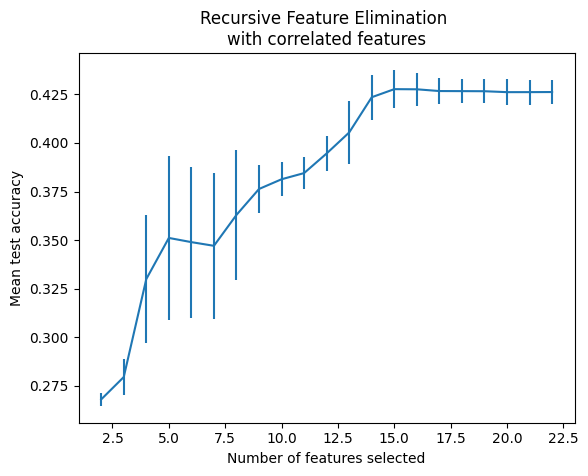

In [34]:
# Import the necessary library for plotting
import matplotlib.pyplot as plt

# Determine the number of scores from the cross-validation results
n_scores = len(rfecv.cv_results_["mean_test_score"])

# Create a new figure for the plot
plt.figure()

# Set the x-axis label as "Number of features selected"
plt.xlabel("Number of features selected")

# Set the y-axis label as "Mean test accuracy"
plt.ylabel("Mean test accuracy")

# Plot the mean test accuracy with error bars for the standard deviation of the test scores
plt.errorbar(
    range(2, n_scores + 2),                   # x-axis values (number of features selected)
    rfecv.cv_results_["mean_test_score"],    # y-axis values (mean test accuracy)
    yerr=rfecv.cv_results_["std_test_score"], # Error bars representing the standard deviation of test scores
)

# Set the title of the plot
plt.title("Recursive Feature Elimination \nwith correlated features")

# Display the plot
plt.show()

In [35]:
print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 15


In [36]:
# Extract selected feature names from the RFECV object
selected_features = rfecv.feature_names_in_[rfecv.support_]

# Display the selected features
selected_features

array(['numeric__pdays', 'numeric__previous', 'numeric__emp.var.rate',
       'numeric__cons.price.idx', 'numeric__cons.conf.idx',
       'categoric__job', 'categoric__marital', 'categoric__education',
       'categoric__default', 'categoric__housing', 'categoric__loan',
       'categoric__contact', 'categoric__month', 'categoric__day_of_week',
       'categoric__poutcome'], dtype=object)

In [37]:
evaluate_model(model_list_balanced,X_train_trans[selected_features],y_train,X_test_trans[selected_features],y_test,cv) 

,Model,Validation Score,Train Score,Test Score
1,SVM,0.465158,0.465783,0.478477
0,Logistic Regression,0.424021,0.424157,0.440765
3,Random Forest,0.312643,0.879708,0.374305
2,Decision Tree,0.278886,0.849024,0.285797


By employing feature selection through a logistic regression model, better results were obtained compared to using all features. `The best model is found to be the SVM model` with an F1 score of 0.465158, 0.465783, dan 0.478477 on the CV subset, training set, and test set, respectively.

# **Evaluation**
<hr>

## Classification Report

In [38]:
# Create an instance of the Support Vector Classifier (SVC) with balanced class weights
svc_balanced = SVC(class_weight='balanced', cache_size=50)

# Select only the features that were identified as important during feature selection for the testing data
X_test_fs = X_test_trans[selected_features]

# Fit the Support Vector Classifier with balanced class weights on the training data using selected features
svc_balanced.fit(X_train_trans[selected_features], y_train)

# Print the classification report, which includes precision, recall, F1-score, and support
# It provides a summary of the performance of the model on the testing data
print(classification_report(y_test, svc_balanced.predict(X_test_fs), digits=5))

              precision    recall  f1-score   support

           0    0.94815   0.87551   0.91038     10965
           1    0.38844   0.62284   0.47848      1392

    accuracy                        0.84705     12357
   macro avg    0.66829   0.74918   0.69443     12357
weighted avg    0.88510   0.84705   0.86173     12357



## Confusion Matrix

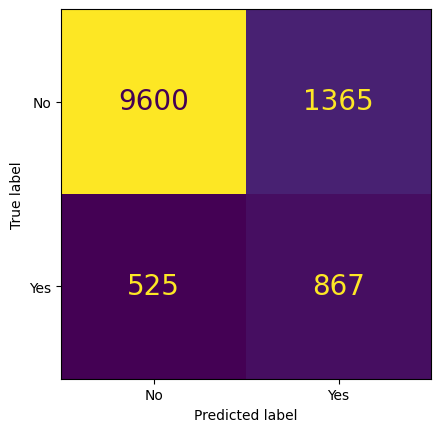

In [39]:
# Confusion matrix on pipeline_lgbm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = svc_balanced.predict(X_test_fs)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)

# Set cmap to "Blues", and label 0 to benign and 1 to malignant
cm_display = cm_display.plot(xticks_rotation="horizontal")
cm_display.ax_.set_xticklabels(["No", "Yes"])
cm_display.ax_.set_yticklabels(["No", "Yes"])

#hide colorbar
cm_display.im_.colorbar.remove()

# Set title to "LightGBM"
# Set fontsize in each cell to 20
for text in cm_display.text_.ravel():
    text.set_fontsize(20)

# **Conclusion**
Based on the above modeling, it can be concluded that modeling using the SVM method with the parameter class_weight="balanced" and utilizing features selected through RFE (Recursive Feature Elimination) is the model with the highest F1-Score. In the Train, CV, and test subsets, the SVM model has values of  0.465158, 0.465783, dan 0.478477, respectively.